In [2]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport


In [4]:
from google.colab import files
uploaded = files.upload()

Saving wdi_wide - copia.csv to wdi_wide - copia.csv


In [7]:
df = pd.read_csv("wdi_wide - copia.csv")

In [8]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 93.90it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.head()

Country Name   Region        Subregion Intermediate Region           GNI  \
0     Afghanistan     Asia    Southern Asia       Southern Asia  1.999614e+10   
1         Albania   Europe  Southern Europe     Southern Europe  1.454147e+10   
2         Algeria   Africa  Northern Africa     Northern Africa  1.418550e+11   
3  American Samoa  Oceania        Polynesia           Polynesia  1.897000e+08   
4         Andorra   Europe  Southern Europe     Southern Europe           NaN   

   Internet use  International tourism  Life expectancy, female  \
0     11.447688                    NaN                   66.388   
1     69.642855           6.406000e+06                   80.201   
2     49.038468           2.371000e+06                   78.133   
3      0.000000           5.270000e+04                      NaN   
4     91.567467           8.235000e+06                      NaN   

   Life expectancy, male  Physicians  Population  \
0                 63.382      0.2782    38928341   
1                 77.002      1.2164     2837743   
2                 75.676      1.7193    43851043   
3                    NaN      0.7810       55197   
4                    NaN      3.3333       77265   

   Women in national parliament  Tertiary education, female  \
0                     27.016129                    4.905080   
1                     29.508197                   73.340530   
2                     25.757576                   64.420807   
3                           NaN                         NaN   
4                     46.428571                         NaN   

   Tertiary education, male  Greenhouse gas emissions  High Income Economy  
0                 14.208100              98920.000000                    0  
1                 46.944038              10080.000000                    0  
2                 38.831699             218910.000000                    0  
3                       NaN                 20.749535                    0  
4                       NaN                590.000000                    0

In [10]:
numerical_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [11]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_columns),
    ("cat", OneHotEncoder(), categorical_columns)
])

In [12]:
X = preprocessor.fit_transform(df)

In [13]:
from sklearn.impute import SimpleImputer

# Impute missing values in the transformed data
imputer = SimpleImputer(strategy='mean') # Use mean imputation for numerical data
X_imputed = imputer.fit_transform(X)

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for KMeans
    kmeans.fit(X_imputed)
    inertias.append(kmeans.inertia_)
    diff = inertias[-2] - inertias[-1] if k > 1 else 0
    print(f'K={k}, Inercia = {kmeans.inertia_:,.6f} - Diferencia = {diff:,.6f}')

K=1, Inercia = 3,250.023041 - Diferencia = 0.000000
K=2, Inercia = 2,415.387601 - Diferencia = 834.635440
K=3, Inercia = 1,945.686979 - Diferencia = 469.700623
K=4, Inercia = 1,706.028277 - Diferencia = 239.658702
K=5, Inercia = 1,598.817322 - Diferencia = 107.210955
K=6, Inercia = 1,491.459348 - Diferencia = 107.357974
K=7, Inercia = 1,428.996456 - Diferencia = 62.462892
K=8, Inercia = 1,334.535735 - Diferencia = 94.460721
K=9, Inercia = 1,259.881481 - Diferencia = 74.654255
K=10, Inercia = 1,203.529721 - Diferencia = 56.351760


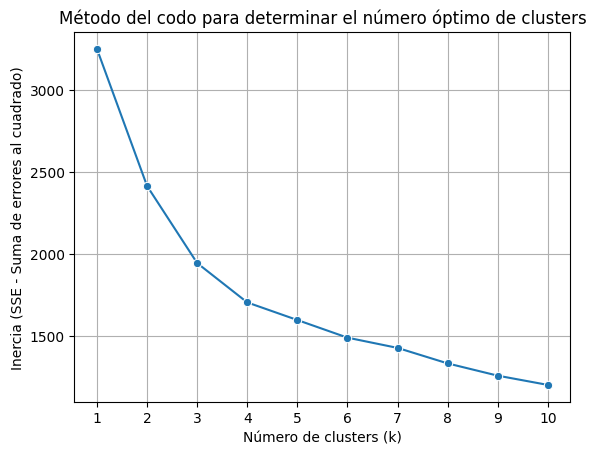

In [14]:
sns.lineplot(x=range(1, 11), y=inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (SSE - Suma de errores al cuadrado)")
plt.title("Método del codo para determinar el número óptimo de clusters")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_imputed)
df["Cluster"] = kmeans.labels_
df.head()

Country Name   Region        Subregion Intermediate Region           GNI  \
0     Afghanistan     Asia    Southern Asia       Southern Asia  1.999614e+10   
1         Albania   Europe  Southern Europe     Southern Europe  1.454147e+10   
2         Algeria   Africa  Northern Africa     Northern Africa  1.418550e+11   
3  American Samoa  Oceania        Polynesia           Polynesia  1.897000e+08   
4         Andorra   Europe  Southern Europe     Southern Europe           NaN   

   Internet use  International tourism  Life expectancy, female  \
0     11.447688                    NaN                   66.388   
1     69.642855           6.406000e+06                   80.201   
2     49.038468           2.371000e+06                   78.133   
3      0.000000           5.270000e+04                      NaN   
4     91.567467           8.235000e+06                      NaN   

   Life expectancy, male  Physicians  Population  \
0                 63.382      0.2782    38928341   
1                 77.002      1.2164     2837743   
2                 75.676      1.7193    43851043   
3                    NaN      0.7810       55197   
4                    NaN      3.3333       77265   

   Women in national parliament  Tertiary education, female  \
0                     27.016129                    4.905080   
1                     29.508197                   73.340530   
2                     25.757576                   64.420807   
3                           NaN                         NaN   
4                     46.428571                         NaN   

   Tertiary education, male  Greenhouse gas emissions  High Income Economy  \
0                 14.208100              98920.000000                    0   
1                 46.944038              10080.000000                    0   
2                 38.831699             218910.000000                    0   
3                       NaN                 20.749535                    0   
4                       NaN                590.000000                    0   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        0

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

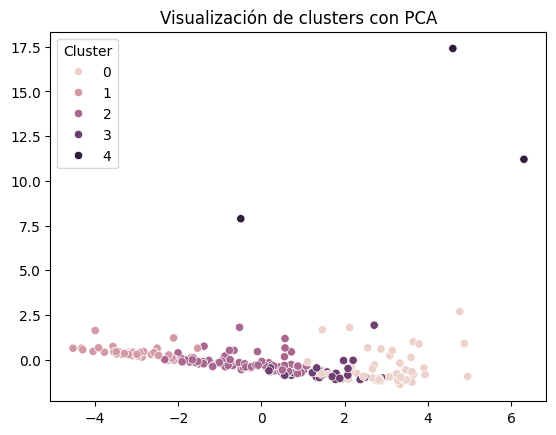

In [17]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"])
plt.title("Visualización de clusters con PCA")
plt.show()

In [18]:
df["Cluster"].value_counts()

Cluster
2    82
1    52
0    48
3    32
4     3
Name: count, dtype: int64

In [19]:
df[numerical_columns + ["Cluster"]].groupby("Cluster").mean()

GNI  Internet use  International tourism  \
Cluster                                                      
0        6.365714e+11     83.150016           2.805571e+07   
1        3.776514e+10     20.306346           1.141447e+06   
2        9.661545e+10     50.851977           3.925494e+06   
3        2.550560e+11     86.350674           7.884948e+06   
4        1.297067e+13     54.293401           1.154870e+08   

         Life expectancy, female  Life expectancy, male  Physicians  \
Cluster                                                               
0                      82.771109              77.169804    3.744950   
1                      64.526577              60.772385    0.226155   
2                      76.523382              71.176868    1.465331   
3                      80.676645              75.970710    2.431518   
4                      77.198000              73.175000    1.816300   

           Population  Women in national parliament  \
Cluster                                               
0        2.360020e+07                     34.186451   
1        2.778534e+07                     21.316705   
2        2.186539e+07                     20.913380   
3        7.709819e+06                     17.765248   
4        1.037200e+09                     22.256869   

         Tertiary education, female  Tertiary education, male  \
Cluster                                                         
0                         88.561727                 70.751255   
1                          7.879373                  9.710469   
2                         36.339100                 28.449232   
3                         52.620739                 32.849787   
4                         64.013975                 50.243496   

         Greenhouse gas emissions  High Income Economy  
Cluster                                                 
0                    2.355728e+05             0.666667  
1                    5.651250e+04             0.000000  
2                    9.402834e+04             0.024390  
3                    1.139015e+05             1.000000  
4                    7.251283e+06             0.333333

In [20]:
df[categorical_columns + ["Cluster"]].groupby("Cluster").agg(lambda x: x.mode()[0])

Country Name    Region                        Subregion  \
Cluster                                                                   
0                    Andorra    Europe                  Northern Europe   
1                Afghanistan    Africa               Sub-Saharan Africa   
2                    Albania      Asia  Latin America and the Caribbean   
3        Antigua and Barbuda  Americas  Latin America and the Caribbean   
4                      China      Asia                     Eastern Asia   

        Intermediate Region  
Cluster                      
0           Northern Europe  
1            Eastern Africa  
2                 Caribbean  
3                 Caribbean  
4              Eastern Asia

<Axes: xlabel='Cluster', ylabel='Tertiary education, male'>

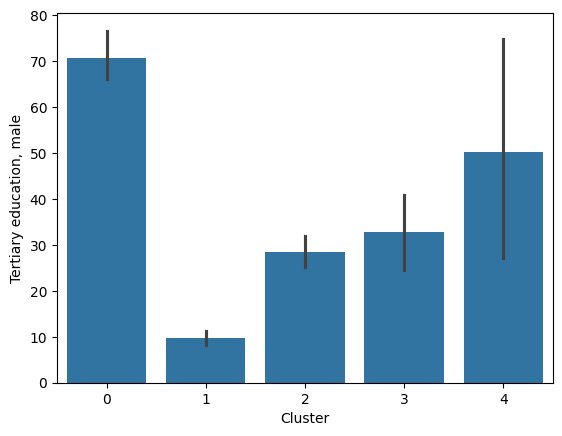

In [21]:
sns.barplot(df, x="Cluster", y="Tertiary education, male", estimator="mean")

<Axes: xlabel='Cluster', ylabel='Tertiary education, female'>

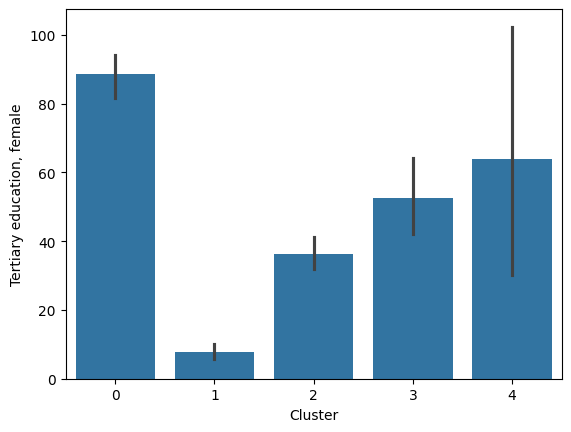

In [22]:
sns.barplot(df, x="Cluster", y="Tertiary education, female", estimator="mean")

<Axes: xlabel='Tertiary education, female', ylabel='Life expectancy, female'>

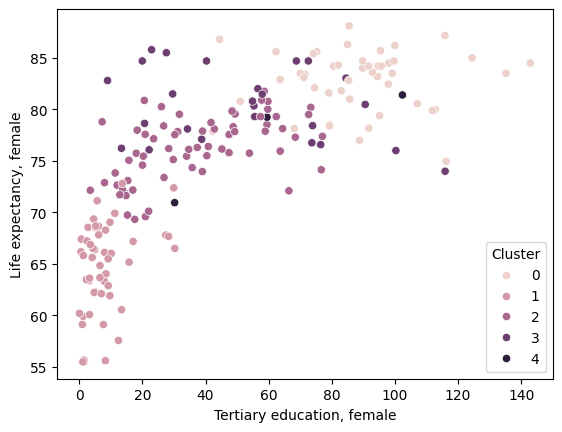

In [23]:
sns.scatterplot(df, x="Tertiary education, female", y="Life expectancy, female", hue="Cluster")

<Axes: xlabel='Tertiary education, male', ylabel='Life expectancy, male'>

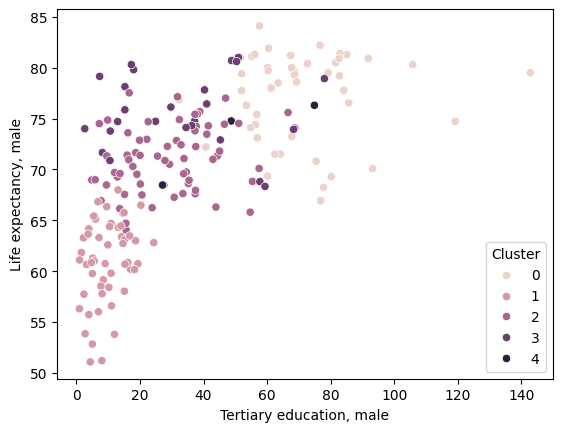

In [24]:
sns.scatterplot(df, x="Tertiary education, male", y="Life expectancy, male", hue="Cluster")

<Axes: xlabel='Tertiary education, male', ylabel='Internet use'>

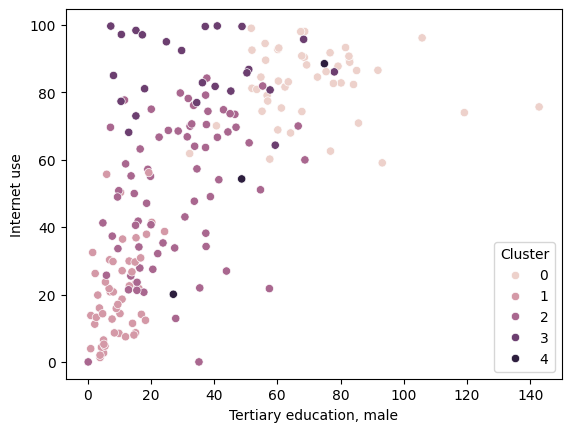

In [25]:
sns.scatterplot(df, x="Tertiary education, male", y="Internet use", hue="Cluster")

<Axes: xlabel='Tertiary education, female', ylabel='Internet use'>

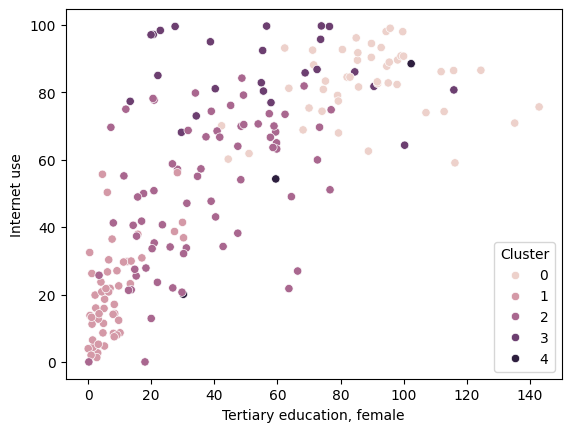

In [26]:
sns.scatterplot(df, x="Tertiary education, female", y="Internet use", hue="Cluster")

<Axes: xlabel='Tertiary education, male', ylabel='GNI'>

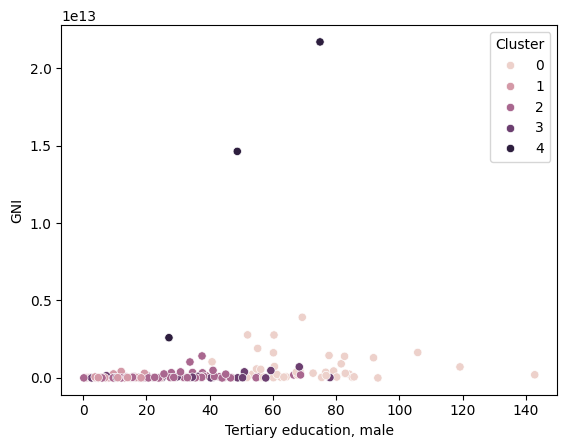

In [27]:
sns.scatterplot(df, x="Tertiary education, male", y="GNI", hue="Cluster")

<Axes: xlabel='Tertiary education, female', ylabel='Women in national parliament'>

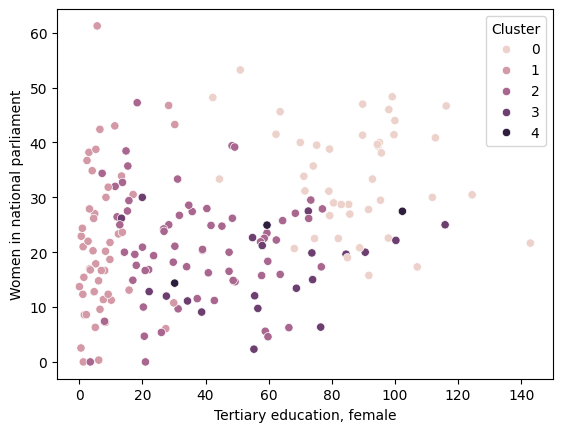

In [28]:
sns.scatterplot(df, x="Tertiary education, female", y="Women in national parliament", hue="Cluster")

<Axes: xlabel='Tertiary education, male', ylabel='Greenhouse gas emissions'>

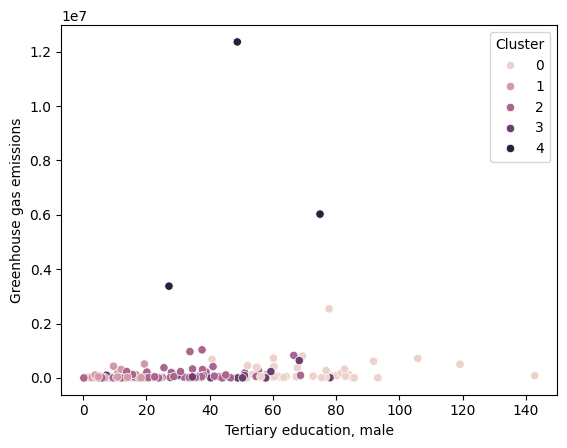

In [29]:
sns.scatterplot(df, x="Tertiary education, male", y="Greenhouse gas emissions", hue="Cluster")

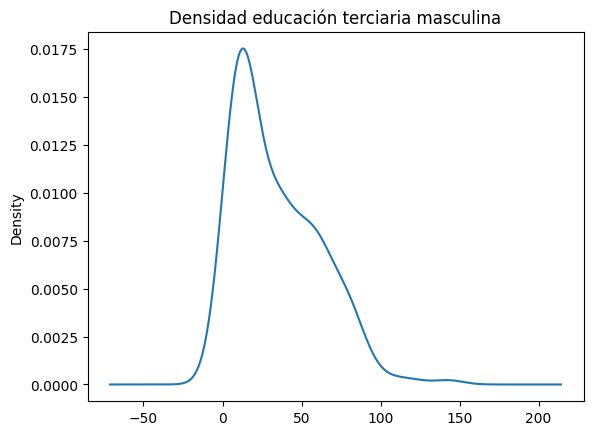

In [30]:
df["Tertiary education, male"].plot.kde(title="Densidad educación terciaria masculina")
plt.show()

<Axes: title={'center': 'Educación terciaria por subregión'}, xlabel='Subregion'>

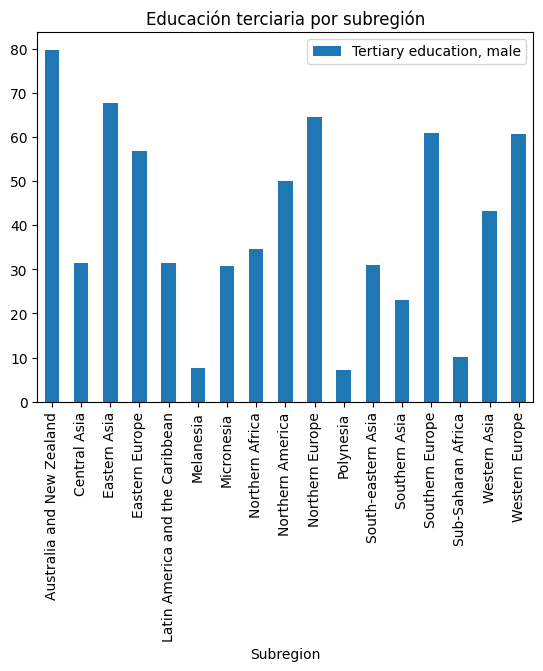

In [39]:
df.groupby("Subregion")["Tertiary education, male"].mean().reset_index().plot.bar(x="Subregion", y="Tertiary education, male", title="Educación terciaria por subregión")

<Axes: title={'center': 'Educación terciaria por subregión'}, xlabel='Subregion'>

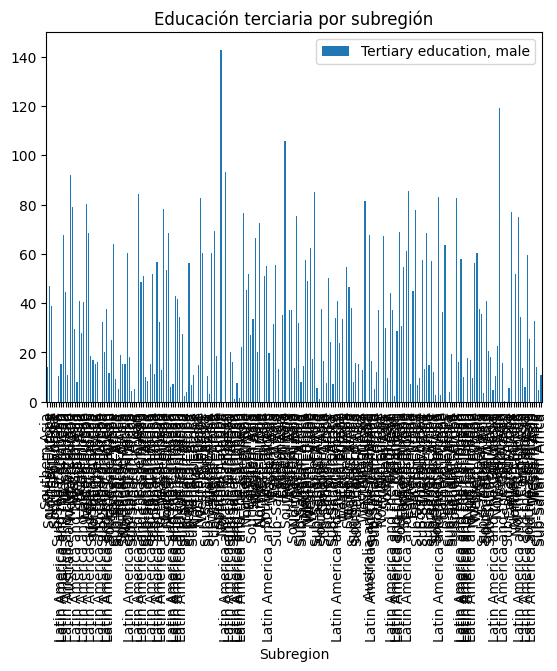

In [31]:
df.plot.bar(x="Subregion", y="Tertiary education, male", title="Educación terciaria por subregión")